In [1]:
%matplotlib inline
from datetime import timedelta, datetime
from glob import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import colors 
import matplotlib.gridspec as gridspec
#import seaborn as sns

import cartopy
import cartopy.crs as ccrs
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

from collections import namedtuple
from shapely import geometry

In [2]:
filedir_root = "/storage/shared/oceanparcels/output_data/data_LauraGN/outputs_parcels/Azores/eNATL60/bFTLEs/"

# Distances:

In [3]:
width = 0.35  # the width of the bars
labels = ['Jul. 2009', 'Aug. 2009', 'Sep. 2009', 'Oct. 2009', 'Nov. 2009', 'Dec. 2009', 'Jan. 2010', 'Feb. 2010', 'Mar. 2010', 'Apr. 2010', 'May. 2010', 'Jun. 2010'] 
x = np.arange(len(labels))  # the label locations


## Loading cumulative dist:

In [4]:
filedir = '/storage/shared/oceanparcels/output_data/data_LauraGN/outputs_parcels/Azores/eNATL60/'

In [5]:
distance_Jul_nT = xr.open_dataset(filedir + 'dist_km_Jul_nT.nc')
distance_Aug_nT = xr.open_dataset(filedir + 'dist_km_Aug_nT.nc')
distance_Sep_nT = xr.open_dataset(filedir + 'dist_km_Sep_nT.nc')
distance_Oct_nT = xr.open_dataset(filedir + 'dist_km_Oct_nT.nc')
distance_Nov_nT = xr.open_dataset(filedir + 'dist_km_Nov_nT.nc')
distance_Dec_nT = xr.open_dataset(filedir + 'dist_km_Dec_nT.nc')
distance_Jan_nT = xr.open_dataset(filedir + 'dist_km_Jan_nT.nc')
distance_Feb_nT = xr.open_dataset(filedir + 'dist_km_Feb_nT.nc')
distance_Mar_nT = xr.open_dataset(filedir + 'dist_km_Mar_nT.nc')
distance_Apr_nT = xr.open_dataset(filedir + 'dist_km_Apr_nT.nc')
distance_May_nT = xr.open_dataset(filedir + 'dist_km_May_nT.nc')
distance_Jun_nT = xr.open_dataset(filedir + 'dist_km_Jun_nT.nc')


In [6]:
distance_Jul_wT = xr.open_dataset(filedir + 'dist_km_Jul_wT.nc')
distance_Aug_wT = xr.open_dataset(filedir + 'dist_km_Aug_wT.nc')
distance_Sep_wT = xr.open_dataset(filedir + 'dist_km_Sep_wT.nc')
distance_Oct_wT = xr.open_dataset(filedir + 'dist_km_Oct_wT.nc')
distance_Nov_wT = xr.open_dataset(filedir + 'dist_km_Nov_wT.nc')
distance_Dec_wT = xr.open_dataset(filedir + 'dist_km_Dec_wT.nc')
distance_Jan_wT = xr.open_dataset(filedir + 'dist_km_Jan_wT.nc')
distance_Feb_wT = xr.open_dataset(filedir + 'dist_km_Feb_wT.nc')
distance_Mar_wT = xr.open_dataset(filedir + 'dist_km_Mar_wT.nc')
distance_Apr_wT = xr.open_dataset(filedir + 'dist_km_Apr_wT.nc')
distance_May_wT = xr.open_dataset(filedir + 'dist_km_May_wT.nc')
distance_Jun_wT = xr.open_dataset(filedir + 'dist_km_Jun_wT.nc')


In [7]:
cum_distance_nT = [distance_Jul_nT.to_array()[0].cumsum(dim='obs'), distance_Aug_nT.to_array()[0].cumsum(dim='obs'), distance_Sep_nT.to_array()[0].cumsum(dim='obs'), distance_Oct_nT.to_array()[0].cumsum(dim='obs'), distance_Nov_nT.to_array()[0].cumsum(dim='obs'), distance_Dec_nT.to_array()[0].cumsum(dim='obs'),
                   distance_Jan_nT.to_array()[0].cumsum(dim='obs'), distance_Feb_nT.to_array()[0].cumsum(dim='obs'), distance_Mar_nT.to_array()[0].cumsum(dim='obs'), distance_Apr_nT.to_array()[0].cumsum(dim='obs'), distance_May_nT.to_array()[0].cumsum(dim='obs'), distance_Jun_nT.to_array()[0].cumsum(dim='obs')]

In [8]:
cum_distance_wT = [distance_Jul_wT.to_array()[0].cumsum(dim='obs'), distance_Aug_wT.to_array()[0].cumsum(dim='obs'), distance_Sep_wT.to_array()[0].cumsum(dim='obs'), distance_Oct_wT.to_array()[0].cumsum(dim='obs'), distance_Nov_wT.to_array()[0].cumsum(dim='obs'), distance_Dec_wT.to_array()[0].cumsum(dim='obs'),
                   distance_Jan_wT.to_array()[0].cumsum(dim='obs'), distance_Feb_wT.to_array()[0].cumsum(dim='obs'), distance_Mar_wT.to_array()[0].cumsum(dim='obs'), distance_Apr_wT.to_array()[0].cumsum(dim='obs'), distance_May_wT.to_array()[0].cumsum(dim='obs'), distance_Jun_wT.to_array()[0].cumsum(dim='obs')]

In [9]:
dist_cum_a = []
dist_cum_b = []

for ii in range(0, len(labels)):
    aa = ((cum_distance_nT[ii].max(dim='obs')).where(cum_distance_nT[ii].max(dim='obs') != 0., drop=True)).data
    dist_cum_a.append(aa) #= (distance_nT[ii].max(dim='obs')).where(distance_nT[ii].max(dim='obs') != 0., drop=True)
    bb = ((cum_distance_wT[ii].max(dim='obs')).where(cum_distance_wT[ii].max(dim='obs') != 0., drop=True)).data
    dist_cum_b.append(bb) 
    

## Loading total dist:

In [10]:
filedir_t = '/storage/shared/oceanparcels/output_data/data_LauraGN/outputs_parcels/Azores/eNATL60/dist_tot_km/'

In [11]:
dist_tot_km_nT_Jul = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Jul.nc')
dist_tot_km_nT_Aug = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Aug.nc')
dist_tot_km_nT_Sep = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Sep.nc')
dist_tot_km_nT_Oct = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Oct.nc')
dist_tot_km_nT_Nov = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Nov.nc')
dist_tot_km_nT_Dec = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Dec.nc')
dist_tot_km_nT_Jan = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Jan.nc')
dist_tot_km_nT_Feb = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Feb.nc')
dist_tot_km_nT_Mar = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Mar.nc')
dist_tot_km_nT_Apr = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Apr.nc')
dist_tot_km_nT_May = xr.open_dataset(filedir_t + 'dist_tot_km_nT_May.nc')
dist_tot_km_nT_Jun = xr.open_dataset(filedir_t + 'dist_tot_km_nT_Jun.nc')

In [12]:
dist_tot_km_wT_Jul = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Jul.nc')
dist_tot_km_wT_Aug = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Aug.nc')
dist_tot_km_wT_Sep = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Sep.nc')
dist_tot_km_wT_Oct = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Oct.nc')
dist_tot_km_wT_Nov = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Nov.nc')
dist_tot_km_wT_Dec = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Dec.nc')
dist_tot_km_wT_Jan = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Jan.nc')
dist_tot_km_wT_Feb = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Feb.nc')
dist_tot_km_wT_Mar = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Mar.nc')
dist_tot_km_wT_Apr = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Apr.nc')
dist_tot_km_wT_May = xr.open_dataset(filedir_t + 'dist_tot_km_wT_May.nc')
dist_tot_km_wT_Jun = xr.open_dataset(filedir_t + 'dist_tot_km_wT_Jun.nc')


In [13]:
dist_tot_km_nT = [dist_tot_km_nT_Jul, dist_tot_km_nT_Aug, dist_tot_km_nT_Sep, dist_tot_km_nT_Oct, dist_tot_km_nT_Nov, dist_tot_km_nT_Dec, 
                  dist_tot_km_nT_Jan, dist_tot_km_nT_Feb, dist_tot_km_nT_Mar, dist_tot_km_nT_Apr, dist_tot_km_nT_May, dist_tot_km_nT_Jun]

In [14]:
dist_tot_km_wT = [dist_tot_km_wT_Jul, dist_tot_km_wT_Aug, dist_tot_km_wT_Sep, dist_tot_km_wT_Oct, dist_tot_km_wT_Nov, dist_tot_km_wT_Dec, 
                  dist_tot_km_wT_Jan, dist_tot_km_wT_Feb, dist_tot_km_wT_Mar, dist_tot_km_wT_Apr, dist_tot_km_wT_May, dist_tot_km_wT_Jun]

In [15]:
dist_tot_nT = []
dist_tot_wT = []

for ii in range(0, len(labels)):
    aa = (dist_tot_km_nT[ii].lon.where(dist_tot_km_nT[ii].lon!=0, drop=True)).data
    dist_tot_nT.append(aa) 
    bb = (dist_tot_km_wT[ii].lon.where(dist_tot_km_wT[ii].lon!=0, drop=True)).data
    dist_tot_wT.append(bb) 

## Getting median values:

In [16]:
med_nT_cum = np.ones((12,1)) * np.nan
med_wT_cum = np.ones((12,1)) * np.nan
med_nT_tot = np.ones((12,1)) * np.nan
med_wT_tot = np.ones((12,1)) * np.nan

for ii in range(0,12) : 
    med_nT_cum[ii] = np.median(dist_cum_a[ii])
    med_wT_cum[ii] = np.median(dist_cum_b[ii])
    med_nT_tot[ii] = np.median(dist_tot_nT[ii])
    med_wT_tot[ii] = np.median(dist_tot_wT[ii])

## Diffs in median values:

In [17]:
cum_dist_diff_nT_wT_n = ((med_wT_cum - med_nT_cum) / med_nT_cum) * 100


In [18]:
cum_dist_diff_nT_wT_n

array([[19.80874162],
       [24.76799229],
       [20.53769217],
       [15.80341937],
       [12.84811164],
       [11.70896359],
       [ 5.8492576 ],
       [ 3.74907795],
       [ 4.57885321],
       [ 8.01723845],
       [11.02681397],
       [ 9.52549734]])

In [19]:
tot_dist_diff_nT_wT_n = ((med_wT_tot - med_nT_tot) / med_nT_tot) * 100


In [20]:
tot_dist_diff_nT_wT_n

array([[-3.43641571],
       [-2.7053165 ],
       [-2.79968554],
       [-3.16826453],
       [-4.98895815],
       [-4.86772989],
       [-3.81361728],
       [-1.37475183],
       [-2.00114669],
       [ 0.53341928],
       [-0.75694812],
       [-1.1669378 ]])

In [21]:
np.argmin(tot_dist_diff_nT_wT_n)

4

In [22]:
(tot_dist_diff_nT_wT_n[-2][0] * -1) * (med_nT_tot[-2])

array([111.61580055])

In [23]:
tot_dist_diff_nT_wT_n2 = ((med_nT_tot - med_wT_tot) / med_wT_tot) * 100
tot_dist_diff_nT_wT_n2

array([[ 3.5587077 ],
       [ 2.78053888],
       [ 2.8803256 ],
       [ 3.27192786],
       [ 5.25092458],
       [ 5.11680199],
       [ 3.96482035],
       [ 1.3939147 ],
       [ 2.04201031],
       [-0.53058902],
       [ 0.76272152],
       [ 1.18071602]])

# GKDE:

## Loading data:

In [24]:
filedir = '/storage/shared/oceanparcels/output_data/data_LauraGN/outputs_parcels/Azores/eNATL60/'

In [25]:
ds_nT_Jul_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0701_hourly_MONTH.nc')
ds_wT_Jul_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0701_hourly_MONTH.nc')

ds_nT_Aug_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0801_hourly_MONTH.nc')
ds_wT_Aug_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0801_hourly_MONTH.nc')

ds_nT_Sep_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0901_hourly_MONTH.nc')
ds_wT_Sep_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0901_hourly_MONTH.nc')

ds_nT_Oct_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1001_hourly_MONTH.nc')
ds_wT_Oct_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1001_hourly_MONTH.nc')

ds_nT_Nov_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1101_hourly_MONTH.nc')
ds_wT_Nov_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1101_hourly_MONTH.nc')

ds_nT_Dec_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1201_hourly_MONTH.nc')
ds_wT_Dec_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1201_hourly_MONTH.nc')

ds_nT_Jan_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0101_hourly_MONTH.nc')
ds_wT_Jan_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0101_hourly_MONTH.nc')

ds_nT_Feb_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0201_hourly_MONTH.nc')
ds_wT_Feb_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0201_hourly_MONTH.nc')

ds_nT_Mar_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0301_hourly_MONTH.nc')
ds_wT_Mar_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0301_hourly_MONTH.nc')

ds_nT_Apr_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0401_hourly_MONTH.nc')
ds_wT_Apr_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0401_hourly_MONTH.nc')

ds_nT_May_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0501_hourly_MONTH.nc')
ds_wT_May_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0501_hourly_MONTH.nc')

ds_nT_Jun_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0601_hourly_MONTH.nc')
ds_wT_Jun_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0601_hourly_MONTH.nc')


In [26]:
dsps_nT = [ds_nT_Jul_month,
ds_nT_Aug_month,
ds_nT_Sep_month,
ds_nT_Oct_month,
ds_nT_Nov_month,
ds_nT_Dec_month,
ds_nT_Jan_month,
ds_nT_Feb_month,
ds_nT_Mar_month,
ds_nT_Apr_month,
ds_nT_May_month,
ds_nT_Jun_month]

In [27]:
dsps_wT = [ds_wT_Jul_month,
ds_wT_Aug_month,
ds_wT_Sep_month,
ds_wT_Oct_month,
ds_wT_Nov_month,
ds_wT_Dec_month,
ds_wT_Jan_month,
ds_wT_Feb_month,
ds_wT_Mar_month,
ds_wT_Apr_month,
ds_wT_May_month,
ds_wT_Jun_month]

In [28]:
filedir_e = 'KDEs/'

In [29]:
kde_nT_Jul = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0701_hourly_MONTH.npz')
kde_nT_Aug = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0801_hourly_MONTH.npz')
kde_nT_Sep = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0901_hourly_MONTH.npz')
kde_nT_Oct = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_1001_hourly_MONTH.npz')
kde_nT_Nov = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_1101_hourly_MONTH.npz')
kde_nT_Dec = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_1201_hourly_MONTH.npz')
kde_nT_Jan = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0101_hourly_MONTH.npz')
kde_nT_Feb = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0201_hourly_MONTH.npz')
kde_nT_Mar = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0301_hourly_MONTH.npz')
kde_nT_Apr = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0401_hourly_MONTH.npz')
kde_nT_May = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0501_hourly_MONTH.npz')
kde_nT_Jun = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_ntides_0601_hourly_MONTH.npz')


In [30]:
kde_nT = [kde_nT_Jul, 
    kde_nT_Aug, 
    kde_nT_Sep,
    kde_nT_Oct,
    kde_nT_Nov,
    kde_nT_Dec,
    kde_nT_Jan,
    kde_nT_Feb,
    kde_nT_Mar,
    kde_nT_Apr,
    kde_nT_May,
    kde_nT_Jun ]


In [31]:
kde_wT_Jul = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0701_hourly_MONTH.npz')
kde_wT_Aug = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0801_hourly_MONTH.npz')
kde_wT_Sep = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0901_hourly_MONTH.npz')
kde_wT_Oct = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_1001_hourly_MONTH.npz')
kde_wT_Nov = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_1101_hourly_MONTH.npz')
kde_wT_Dec = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_1201_hourly_MONTH.npz')
kde_wT_Jan = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0101_hourly_MONTH.npz')
kde_wT_Feb = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0201_hourly_MONTH.npz')
kde_wT_Mar = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0301_hourly_MONTH.npz')
kde_wT_Apr = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0401_hourly_MONTH.npz')
kde_wT_May = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0501_hourly_MONTH.npz')
kde_wT_Jun = np.load(filedir_e + 'KDE_Particle_AZO_grid100000p_wtides_0601_hourly_MONTH.npz')


In [32]:
kde_wT = [kde_wT_Jul, 
    kde_wT_Aug, 
    kde_wT_Sep,
    kde_wT_Oct,
    kde_wT_Nov,
    kde_wT_Dec,
    kde_wT_Jan,
    kde_wT_Feb,
    kde_wT_Mar,
    kde_wT_Apr,
    kde_wT_May,
    kde_wT_Jun ]


In [33]:
ntitles = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'] # order by OGCM months


## GKDE plot:

In [34]:
width = 0.35  # the width of the bars

labels = ['Jul. 2009', 'Aug. 2009', 'Sep. 2009', 'Oct. 2009', 'Nov. 2009', 'Dec. 2009', 'Jan. 2010', 'Feb. 2010', 'Mar. 2010', 'Apr. 2010', 'May. 2010', 'Jun. 2010'] # order by OGCM months
x = np.arange(len(labels))  # the label locations

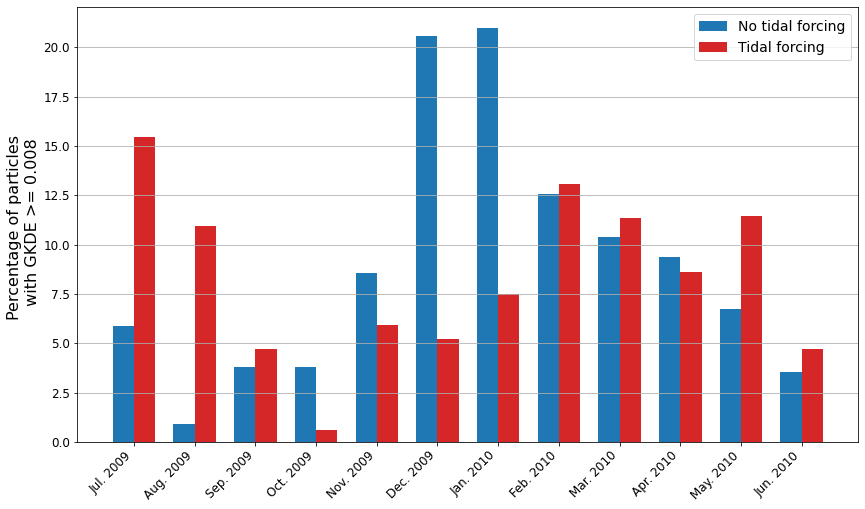

In [35]:
perc_0080_nT = []
perc_0080_wT = []
    
plt.figure(figsize=(14, 8)) #(17,5) 

ax = plt.subplot(111)
for ii in range(0, len(ntitles)):
    
    ########
    
    x_nT = kde_nT[ii]['kde_x']
    y_nT = kde_nT[ii]['kde_y']
    z_nT = kde_nT[ii]['kde_z']
    
    x_wT = kde_wT[ii]['kde_x']
    y_wT = kde_wT[ii]['kde_y']
    z_wT = kde_wT[ii]['kde_z']
    
    lon_del_nT = dsps_nT[ii]['lon'][:,-1].where((dsps_nT[ii]['lon'][:,-1]>-35.) & 
                                                  (dsps_nT[ii]['lon'][:,-1]<-18.) &
                                                  (dsps_nT[ii]['lat'][:,-1]>30.) &
                                                  (dsps_nT[ii]['lat'][:,-1]<40.), np.nan)
    
    lon_del_wT = dsps_wT[ii]['lon'][:,-1].where((dsps_wT[ii]['lon'][:,-1]>-35.) & 
                                                  (dsps_wT[ii]['lon'][:,-1]<-18.) &
                                                  (dsps_wT[ii]['lat'][:,-1]>30.) &
                                                  (dsps_wT[ii]['lat'][:,-1]<40.), np.nan)
    nondelp_nT = sum(~np.isnan(lon_del_nT.data))
    nondelp_wT = sum(~np.isnan(lon_del_wT.data))
    
    var_nT = ((np.count_nonzero(z_nT >= 0.008)) / nondelp_nT) * 100
    var_wT = ((np.count_nonzero(z_wT >= 0.008)) / nondelp_wT) * 100
    
    perc_0080_nT.append(var_nT)
    perc_0080_wT.append(var_wT)
    ########
    
    if ii == 0:
        ax.bar(x[ii] - width/2, var_nT, width, label='No tidal forcing', color='C0')
    else:
        ax.bar(x[ii] - width/2, var_nT, width, color='C0')
    #rects1 = ax.bar(x - width/2, skw_2D_intime_eulerian[:,ind_2d_borders_T_min_eulerian], width, label='SMOC eulerian', color='C2')

    if ii == 0:
        ax.bar(x[ii] + width/2, var_wT, width, label='Tidal forcing', color='C3')
    else:
        ax.bar(x[ii] + width/2, var_wT, width, color='C3')
    #rects1 = ax.bar(x - width/2, skw_2D_intime_eulerian[:,ind_2d_borders_T_min_eulerian], width, label='SMOC eulerian', color='C2')
        
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, horizontalalignment='right')
ax.legend(fontsize=14)
#ax.set_ylim([0, .014])
ax.grid(axis='y')
ax.set_ylabel('Percentage of particles \n with GKDE >= 0.008', size=16)
ax.tick_params(axis='both', which='major', labelsize=12)

# plt.savefig('figs/' + 'KDE_nT_wT_monthly_ALL_perc_0080.jpg', dpi=300)

plt.show()


## Perc. diff:

In [36]:
perc_0080_nT = np.array(perc_0080_nT )
perc_0080_wT = np.array(perc_0080_wT)

In [37]:
# GKDE_diff_nT_wT   = perc_0080_wT - perc_0080_nT
GKDE_diff_nT_wT_n = ((perc_0080_wT - perc_0080_nT) / perc_0080_nT) * 100
    
# GKDE_diff_nT_wT_dwn   = perc_0080_wT / perc_0080_nT
# GKDE_diff_nT_wT_dnw   = perc_0080_nT / perc_0080_wT

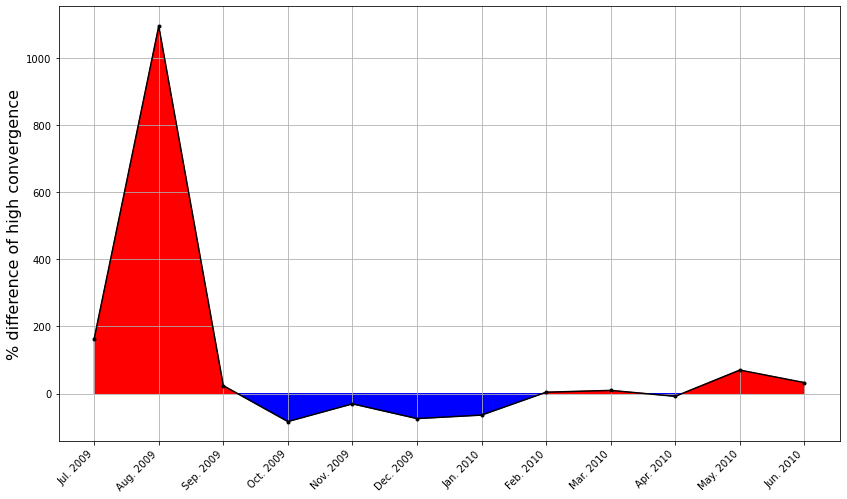

In [38]:
d=np.zeros_like(x)

fig = plt.figure(figsize=(14, 8)) #(17,5)
ax1 = plt.subplot(111)
    
plt.plot(x, GKDE_diff_nT_wT_n, '.-k')
ax1.fill_between(x, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n>=d, interpolate=True, color='red')
ax1.fill_between(x, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n<=d, interpolate=True, color='blue')

# ax1.legend(fontsize=16)
        
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, horizontalalignment='right')
ax1.grid() #axis='y')
ax1.set_ylabel('% difference of high convergence', size=16);
# ax1.set_ylim([-50, 50])

# plt.savefig('figs/FTLE_backward_v02_biweekly_perc05_SKEW_nT_wT_AllMonths.png', dpi=300)


### Adding ylims:

(-100.0, 100.0)

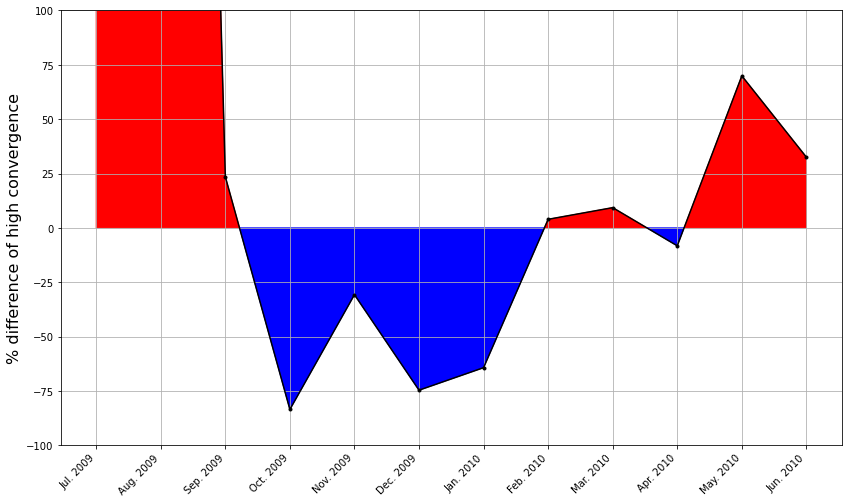

In [39]:
d=np.zeros_like(x)

fig = plt.figure(figsize=(14, 8)) #(17,5)
ax1 = plt.subplot(111)
    
plt.plot(x, GKDE_diff_nT_wT_n, '.-k')
ax1.fill_between(x, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n>=d, interpolate=True, color='red')
ax1.fill_between(x, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n<=d, interpolate=True, color='blue')

# ax1.legend(fontsize=16)
        
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, horizontalalignment='right')
ax1.grid() #axis='y')
ax1.set_ylabel('% difference of high convergence', size=16);
ax1.set_ylim([-100, 100])

# plt.savefig('figs/FTLE_backward_v02_biweekly_perc05_SKEW_nT_wT_AllMonths.png', dpi=300)


# FTLE plots:

## Loading data:

In [40]:
dFTLE_nT_Jan_w01 = np.load(filedir_root + 'FTLE_b_nT_Jan_biw_w01_v02.npz')
dFTLE_nT_Feb_w01 = np.load(filedir_root + 'FTLE_b_nT_Feb_biw_w01_v02.npz')
dFTLE_nT_Mar_w01 = np.load(filedir_root + 'FTLE_b_nT_Mar_biw_w01_v02.npz')
dFTLE_nT_Jul_w01 = np.load(filedir_root + 'FTLE_b_nT_Jul_biw_w01_v02.npz')
dFTLE_nT_Aug_w01 = np.load(filedir_root + 'FTLE_b_nT_Aug_biw_w01_v02_CHECK01.npz')
dFTLE_nT_Sep_w01 = np.load(filedir_root + 'FTLE_b_nT_Sep_biw_w01_v02.npz')

In [41]:
dFTLE_wT_Jan_w01 = np.load(filedir_root + 'FTLE_b_wT_Jan_biw_w01_v02.npz')
dFTLE_wT_Feb_w01 = np.load(filedir_root + 'FTLE_b_wT_Feb_biw_w01_v02.npz')
dFTLE_wT_Mar_w01 = np.load(filedir_root + 'FTLE_b_wT_Mar_biw_w01_v02.npz')
dFTLE_wT_Jul_w01 = np.load(filedir_root + 'FTLE_b_wT_Jul_biw_w01_v02.npz')
dFTLE_wT_Aug_w01 = np.load(filedir_root + 'FTLE_b_wT_Aug_biw_w01_v02.npz')
dFTLE_wT_Sep_w01 = np.load(filedir_root + 'FTLE_b_wT_Sep_biw_w01_v02.npz')

In [42]:
dFTLE_nT_Oct_w01 = np.load(filedir_root + 'FTLE_b_nT_Oct_biw_w01_v02.npz')
dFTLE_nT_Nov_w01 = np.load(filedir_root + 'FTLE_b_nT_Nov_biw_w01_v02.npz')
dFTLE_nT_Dec_w01 = np.load(filedir_root + 'FTLE_b_nT_Dec_biw_w01_v02.npz')
dFTLE_nT_Apr_w01 = np.load(filedir_root + 'FTLE_b_nT_Apr_biw_w01_v02.npz')
dFTLE_nT_May_w01 = np.load(filedir_root + 'FTLE_b_nT_May_biw_w01_v02.npz')
dFTLE_nT_Jun_w01 = np.load(filedir_root + 'FTLE_b_nT_Jun_biw_w01_v02.npz')

In [43]:
dFTLE_wT_Oct_w01 = np.load(filedir_root + 'FTLE_b_wT_Oct_biw_w01_v02.npz')
dFTLE_wT_Nov_w01 = np.load(filedir_root + 'FTLE_b_wT_Nov_biw_w01_v02.npz')
dFTLE_wT_Dec_w01 = np.load(filedir_root + 'FTLE_b_wT_Dec_biw_w01_v02.npz')
dFTLE_wT_Apr_w01 = np.load(filedir_root + 'FTLE_b_wT_Apr_biw_w01_v02.npz')
dFTLE_wT_May_w01 = np.load(filedir_root + 'FTLE_b_wT_May_biw_w01_v02.npz')
dFTLE_wT_Jun_w01 = np.load(filedir_root + 'FTLE_b_wT_Jun_biw_w01_v02.npz')

In [44]:
dFTLE_nT_Jan_w02 = np.load(filedir_root + 'FTLE_b_nT_Jan_biw_w02_v02.npz')
dFTLE_nT_Feb_w02 = np.load(filedir_root + 'FTLE_b_nT_Feb_biw_w02_v02.npz')
dFTLE_nT_Mar_w02 = np.load(filedir_root + 'FTLE_b_nT_Mar_biw_w02_v02.npz')
dFTLE_nT_Jul_w02 = np.load(filedir_root + 'FTLE_b_nT_Jul_biw_w02_v02.npz')
dFTLE_nT_Aug_w02 = np.load(filedir_root + 'FTLE_b_nT_Aug_biw_w02_v02.npz')
dFTLE_nT_Sep_w02 = np.load(filedir_root + 'FTLE_b_nT_Sep_biw_w02_v02.npz')

In [45]:
dFTLE_wT_Jan_w02 = np.load(filedir_root + 'FTLE_b_wT_Jan_biw_w02_v02.npz')
dFTLE_wT_Feb_w02 = np.load(filedir_root + 'FTLE_b_wT_Feb_biw_w02_v02.npz')
dFTLE_wT_Mar_w02 = np.load(filedir_root + 'FTLE_b_wT_Mar_biw_w02_v02.npz')
dFTLE_wT_Jul_w02 = np.load(filedir_root + 'FTLE_b_wT_Jul_biw_w02_v02.npz')
dFTLE_wT_Aug_w02 = np.load(filedir_root + 'FTLE_b_wT_Aug_biw_w02_v02.npz')
dFTLE_wT_Sep_w02 = np.load(filedir_root + 'FTLE_b_wT_Sep_biw_w02_v02.npz')

In [46]:
dFTLE_nT_Oct_w02 = np.load(filedir_root + 'FTLE_b_nT_Oct_biw_w02_v02.npz')
dFTLE_nT_Nov_w02 = np.load(filedir_root + 'FTLE_b_nT_Nov_biw_w02_v02.npz')
dFTLE_nT_Dec_w02 = np.load(filedir_root + 'FTLE_b_nT_Dec_biw_w02_v02.npz')
dFTLE_nT_Apr_w02 = np.load(filedir_root + 'FTLE_b_nT_Apr_biw_w02_v02.npz')
dFTLE_nT_May_w02 = np.load(filedir_root + 'FTLE_b_nT_May_biw_w02_v02.npz')
dFTLE_nT_Jun_w02 = np.load(filedir_root + 'FTLE_b_nT_Jun_biw_w02_v02.npz')

In [47]:
dFTLE_wT_Oct_w02 = np.load(filedir_root + 'FTLE_b_wT_Oct_biw_w02_v02.npz')
dFTLE_wT_Nov_w02 = np.load(filedir_root + 'FTLE_b_wT_Nov_biw_w02_v02.npz')
dFTLE_wT_Dec_w02 = np.load(filedir_root + 'FTLE_b_wT_Dec_biw_w02_v02.npz')
dFTLE_wT_Apr_w02 = np.load(filedir_root + 'FTLE_b_wT_Apr_biw_w02_v02.npz')
dFTLE_wT_May_w02 = np.load(filedir_root + 'FTLE_b_wT_May_biw_w02_v02.npz')
dFTLE_wT_Jun_w02 = np.load(filedir_root + 'FTLE_b_wT_Jun_biw_w02_v02.npz')

In [48]:
nmonths = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

In [49]:
dFTLE_nTs_w01 = [dFTLE_nT_Jul_w01, dFTLE_nT_Aug_w01, dFTLE_nT_Sep_w01, dFTLE_nT_Oct_w01, dFTLE_nT_Nov_w01, dFTLE_nT_Dec_w01, dFTLE_nT_Jan_w01, dFTLE_nT_Feb_w01, dFTLE_nT_Mar_w01, dFTLE_nT_Apr_w01, dFTLE_nT_May_w01, dFTLE_nT_Jun_w01]

In [50]:
dFTLE_wTs_w01 = [dFTLE_wT_Jul_w01, dFTLE_wT_Aug_w01, dFTLE_wT_Sep_w01, dFTLE_wT_Oct_w01, dFTLE_wT_Nov_w01, dFTLE_wT_Dec_w01, dFTLE_wT_Jan_w01, dFTLE_wT_Feb_w01, dFTLE_wT_Mar_w01, dFTLE_wT_Apr_w01, dFTLE_wT_May_w01, dFTLE_wT_Jun_w01]

In [51]:
dFTLE_nTs_w02 = [dFTLE_nT_Jul_w02, dFTLE_nT_Aug_w02, dFTLE_nT_Sep_w02, dFTLE_nT_Oct_w02, dFTLE_nT_Nov_w02, dFTLE_nT_Dec_w02, dFTLE_nT_Jan_w02, dFTLE_nT_Feb_w02, dFTLE_nT_Mar_w02, dFTLE_nT_Apr_w02, dFTLE_nT_May_w02, dFTLE_nT_Jun_w02]

In [52]:
dFTLE_wTs_w02 = [dFTLE_wT_Jul_w02, dFTLE_wT_Aug_w02, dFTLE_wT_Sep_w02, dFTLE_wT_Oct_w02, dFTLE_wT_Nov_w02, dFTLE_wT_Dec_w02, dFTLE_wT_Jan_w02, dFTLE_wT_Feb_w02, dFTLE_wT_Mar_w02, dFTLE_wT_Apr_w02, dFTLE_wT_May_w02, dFTLE_wT_Jun_w02]

In [53]:
dFTLE_nTs = [dFTLE_nT_Jul_w01, dFTLE_nT_Jul_w02, dFTLE_nT_Aug_w01, dFTLE_nT_Aug_w02, dFTLE_nT_Sep_w01, dFTLE_nT_Sep_w02, dFTLE_nT_Oct_w01, dFTLE_nT_Oct_w02, dFTLE_nT_Nov_w01, dFTLE_nT_Nov_w02, dFTLE_nT_Dec_w01, dFTLE_nT_Dec_w02, dFTLE_nT_Jan_w01, dFTLE_nT_Jan_w02, dFTLE_nT_Feb_w01, dFTLE_nT_Feb_w02, dFTLE_nT_Mar_w01, dFTLE_nT_Mar_w02, dFTLE_nT_Apr_w01, dFTLE_nT_Apr_w02, dFTLE_nT_May_w01, dFTLE_nT_May_w02, dFTLE_nT_Jun_w01, dFTLE_nT_Jun_w02]

In [54]:
dFTLE_wTs = [dFTLE_wT_Jul_w01, dFTLE_wT_Jul_w02, dFTLE_wT_Aug_w01, dFTLE_wT_Aug_w02, dFTLE_wT_Sep_w01, dFTLE_wT_Sep_w02, dFTLE_wT_Oct_w01, dFTLE_wT_Oct_w02, dFTLE_wT_Nov_w01, dFTLE_wT_Nov_w02, dFTLE_wT_Dec_w01, dFTLE_wT_Dec_w02, dFTLE_wT_Jan_w01, dFTLE_wT_Jan_w02, dFTLE_wT_Feb_w01, dFTLE_wT_Feb_w02, dFTLE_wT_Mar_w01, dFTLE_wT_Mar_w02, dFTLE_wT_Apr_w01, dFTLE_wT_Apr_w02, dFTLE_wT_May_w01, dFTLE_wT_May_w02, dFTLE_wT_Jun_w01, dFTLE_wT_Jun_w02]

## Plotting values above 0.5:

In [55]:
step = .004 # degrees
grid_lons, grid_lats = np.meshgrid(np.arange(-27, -21+step, step), np.arange(32.5, 36.5+step, step))

In [56]:
nb_points = np.size(grid_lats)

## For day 01 and 15 above 0.5:

In [57]:
width = 0.35  # the width of the bars
labels_all = ['01/07/2009', '15/07/2009', '01/08/2009', '15/08/2009', '01/09/2009', '15/09/2009', '01/10/2009', '15/10/2009', '01/11/2009', '15/11/2009', '01/12/2009', '15/12/2009', '01/01/2010', '15/01/2010', '01/02/2010', '15/02/2010','01/03/2010', '15/03/2010', '01/04/2010', '15/04/2010',  '01/05/2010', '15/05/2010', '01/06/2010', '15/06/2010']
x_all = np.arange(len(labels_all))  # the label locations


## Time evolution of percentage difference:

Text(0, 0.5, 'Percentage bFTLE backward >= 0.5')

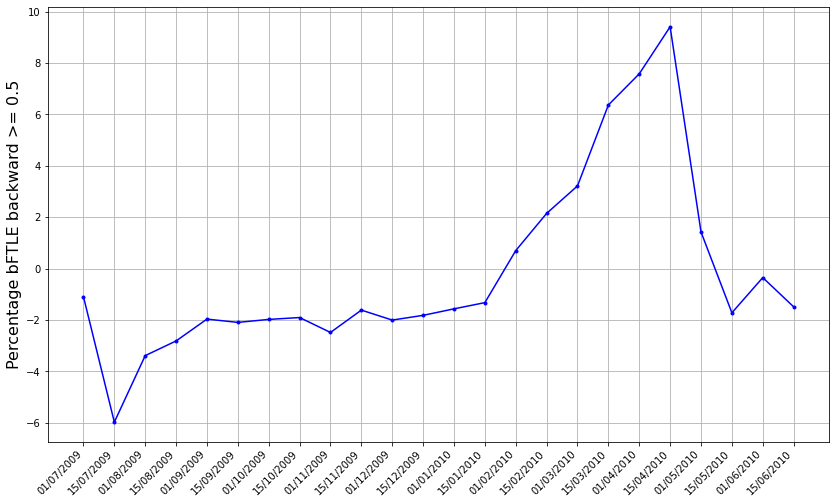

In [58]:
# nt- wt
diff_nT_wT   = []
diff_nT_wT_n = []
fig = plt.figure(figsize=(14, 8)) #(17,5)
ax1 = plt.subplot(111)
    
# FTLE backward        
    
for ii in range(0, len(labels_all)):
    
    FTLE_b_nT = dFTLE_nTs[ii]['FTLE_b']
    FTLE_b_wT = dFTLE_wTs[ii]['FTLE_b']
    
    var_nT = ((np.count_nonzero(FTLE_b_nT >= 0.5)) / nb_points) * 100
    var_wT = ((np.count_nonzero(FTLE_b_wT >= 0.5)) / nb_points) * 100
    
    diff_nT_wT.append(var_wT-var_nT)
    diff_nT_wT_n.append(((var_wT-var_nT)/var_nT)*100)
    
plt.plot(x_all, diff_nT_wT, '.-b')

# ax1.legend(fontsize=16)
        
ax1.set_xticks(x_all)
ax1.set_xticklabels(labels_all, rotation=45, horizontalalignment='right')
ax1.grid() #axis='y')
ax1.set_ylabel('Percentage bFTLE backward >= 0.5', size=16)
# ax1.set_ylim([0, .7])

# plt.savefig('figs/FTLE_backward_v02_biweekly_perc05_SKEW_nT_wT_AllMonths.png', dpi=300)


## Plotting normalized difference:

Text(0, 0.5, '% increase/decrease of high convergence')

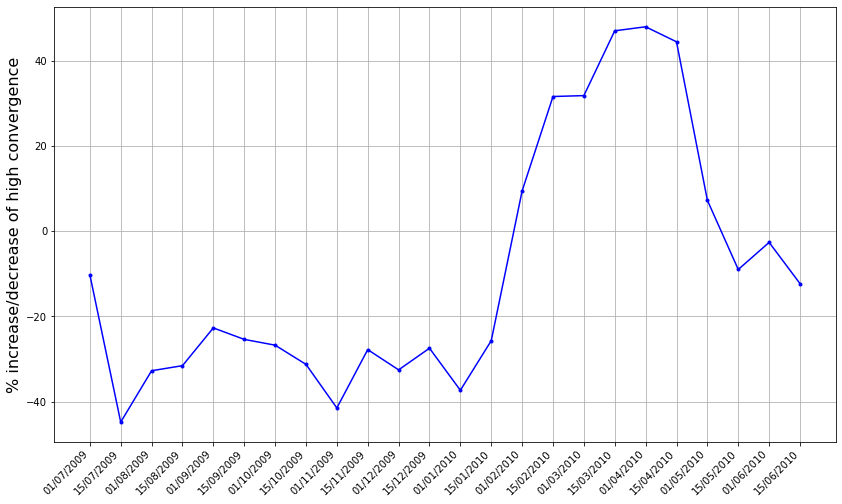

In [59]:
# nt- wt
fig = plt.figure(figsize=(14, 8)) #(17,5)
ax1 = plt.subplot(111)
    
# FTLE backward        

    
plt.plot(x_all, diff_nT_wT_n, '.-b')

# ax1.legend(fontsize=16)
        
ax1.set_xticks(x_all)
ax1.set_xticklabels(labels_all, rotation=45, horizontalalignment='right')
ax1.grid() #axis='y')
ax1.set_ylabel('% increase/decrease of high convergence', size=16)
# ax1.set_ylim([0, .7])

# plt.savefig('figs/FTLE_backward_v02_biweekly_perc05_SKEW_nT_wT_AllMonths.png', dpi=300)


(-50.0, 50.0)

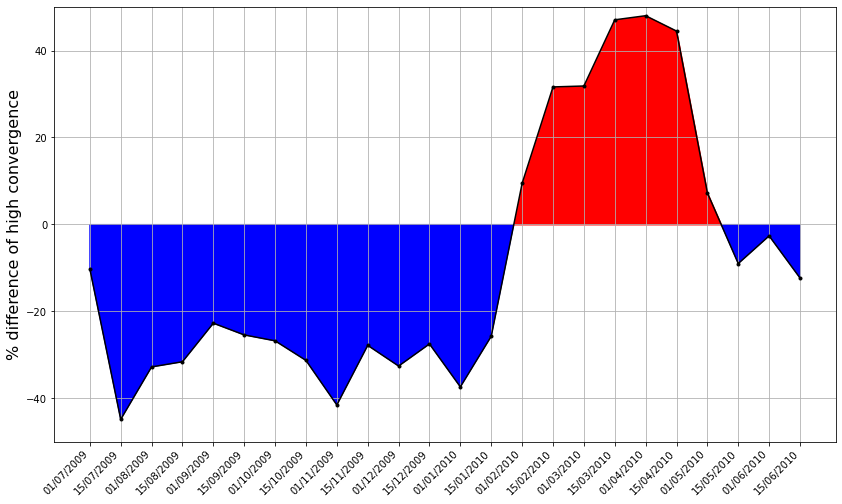

In [60]:
d=np.zeros_like(x_all)

# nt- wt
fig = plt.figure(figsize=(14, 8)) #(17,5)
ax1 = plt.subplot(111)
    
# FTLE backward        

plt.plot(x_all, diff_nT_wT_n, '.-k')
ax1.fill_between(x_all, diff_nT_wT_n, where=diff_nT_wT_n>=d, interpolate=True, color='red')
ax1.fill_between(x_all, diff_nT_wT_n, where=diff_nT_wT_n<=d, interpolate=True, color='blue')

# ax1.legend(fontsize=16)
        
ax1.set_xticks(x_all)
ax1.set_xticklabels(labels_all, rotation=45, horizontalalignment='right')
ax1.grid() #axis='y')
ax1.set_ylabel('% difference of high convergence', size=16)
ax1.set_ylim([-50, 50])

# plt.savefig('figs/FTLE_backward_v02_biweekly_perc05_SKEW_nT_wT_AllMonths.png', dpi=300)


# All together:

In [61]:
labels

['Jul. 2009',
 'Aug. 2009',
 'Sep. 2009',
 'Oct. 2009',
 'Nov. 2009',
 'Dec. 2009',
 'Jan. 2010',
 'Feb. 2010',
 'Mar. 2010',
 'Apr. 2010',
 'May. 2010',
 'Jun. 2010']

In [62]:
labels = labels_all[::2]
labels

['01/07/2009',
 '01/08/2009',
 '01/09/2009',
 '01/10/2009',
 '01/11/2009',
 '01/12/2009',
 '01/01/2010',
 '01/02/2010',
 '01/03/2010',
 '01/04/2010',
 '01/05/2010',
 '01/06/2010']

In [63]:
labels_all

['01/07/2009',
 '15/07/2009',
 '01/08/2009',
 '15/08/2009',
 '01/09/2009',
 '15/09/2009',
 '01/10/2009',
 '15/10/2009',
 '01/11/2009',
 '15/11/2009',
 '01/12/2009',
 '15/12/2009',
 '01/01/2010',
 '15/01/2010',
 '01/02/2010',
 '15/02/2010',
 '01/03/2010',
 '15/03/2010',
 '01/04/2010',
 '15/04/2010',
 '01/05/2010',
 '15/05/2010',
 '01/06/2010',
 '15/06/2010']

# Same y-axis:

# Skipping last point of bFTLE: (so grid in the vertical well aligned between subplots)

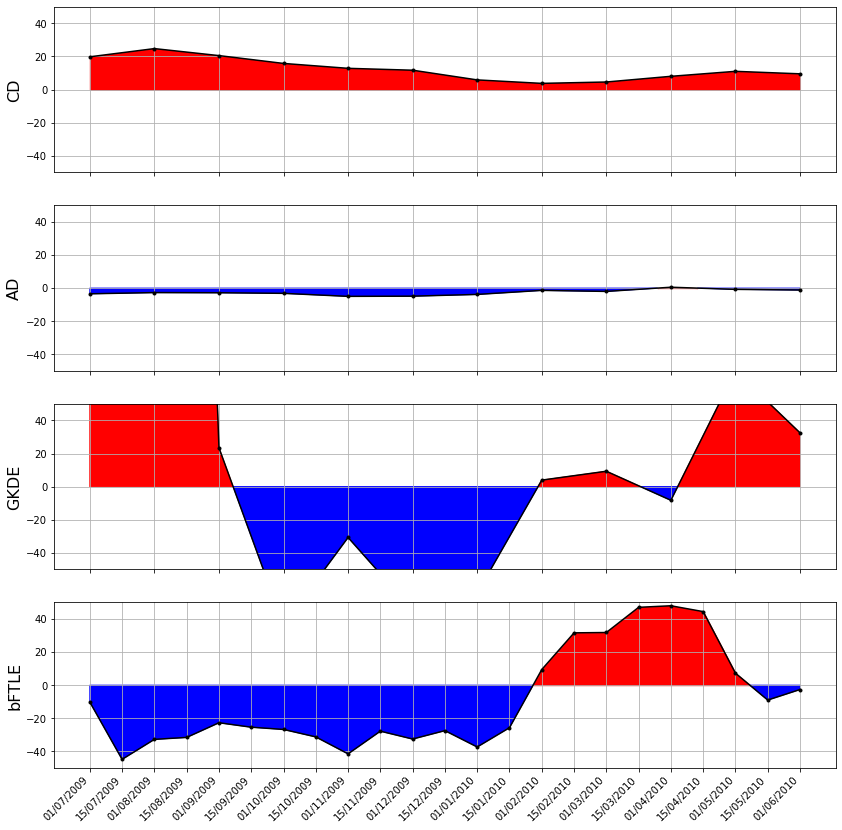

In [64]:
x = np.arange(len(labels))  # the label locations
d=np.zeros_like(x)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14,14))

x = np.arange(0,len(labels)*2,2) # the label locations
d=np.zeros_like(x)
### CD
ax1.plot(x, cum_dist_diff_nT_wT_n[:,0], '.-k')
# ax1.tick_params('x', labelsize=6)

ax1.fill_between(x, cum_dist_diff_nT_wT_n[:,0], where=cum_dist_diff_nT_wT_n[:,0]>=d, interpolate=True, color='red')
ax1.fill_between(x, cum_dist_diff_nT_wT_n[:,0], where=cum_dist_diff_nT_wT_n[:,0]<=d, interpolate=True, color='blue')

ax1.grid() #axis='y')
ax1.set_ylabel('CD', size=16);
ax1.set_xticks(x)
# ax4.set_xticklabels(labels, rotation=45, horizontalalignment='right')
# ax1.set_xticklabels(labels_all, rotation=45, horizontalalignment='right')
ax1.set_ylim([-50, 50])

### AD
ax2.plot(x, tot_dist_diff_nT_wT_n[:,0], '.-k')
# ax2.tick_params('x', labelsize=6)

ax2.fill_between(x, tot_dist_diff_nT_wT_n[:,0], where=tot_dist_diff_nT_wT_n[:,0]>=d, interpolate=True, color='red')
ax2.fill_between(x, tot_dist_diff_nT_wT_n[:,0], where=tot_dist_diff_nT_wT_n[:,0]<=d, interpolate=True, color='blue')

ax2.grid() #axis='y')
ax2.set_ylabel('AD', size=16);
ax2.set_xticks(x) #x)
# ax4.set_xticklabels(labels, rotation=45, horizontalalignment='right')
# ax1.set_xticklabels(labels_all, rotation=45, horizontalalignment='right')
ax2.set_ylim([-50, 50])

# plt.plot(t, s2)
# # make these tick labels invisible
# plt.tick_params('x', labelbottom=False)

### GKDE

ax3.plot(x, GKDE_diff_nT_wT_n, '.-k')
ax3.fill_between(x, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n>=d, interpolate=True, color='red')
ax3.fill_between(x, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n<=d, interpolate=True, color='blue')

ax3.grid() #axis='y')
# ax3.set_ylabel('% difference of high convergence', size=16);

ax3.set_ylabel('GKDE', size=16);
ax3.set_xticks(x)
# ax3.set_xticklabels(labels, rotation=45, horizontalalignment='right')
ax3.set_ylim([-50, 50])

### BFTLE
x = np.arange(len(labels_all))  # the label locations
d=np.zeros_like(x)

ax4.plot(x[0:-1], diff_nT_wT_n[0:-1], '.-k')
ax4.fill_between(x[0:-1], diff_nT_wT_n[0:-1], where=diff_nT_wT_n[0:-1]>=d[0:-1], interpolate=True, color='red')
ax4.fill_between(x[0:-1], diff_nT_wT_n[0:-1], where=diff_nT_wT_n[0:-1]<=d[0:-1], interpolate=True, color='blue')

ax4.grid() #axis='y')
ax4.set_ylabel('bFTLE', size=16) #% difference of high convergence', size=16);
ax4.set_xticks(x[0:-1])
# ax4.set_xticklabels(labels, rotation=45, horizontalalignment='right')
ax4.set_xticklabels(labels_all[0:-1], rotation=45, horizontalalignment='right')
ax4.set_ylim([-50, 50])

for ax in fig.get_axes():
    ax.label_outer()
    
plt.show()


# --> Now well alligned!

## Nicer plot: (different ylims)

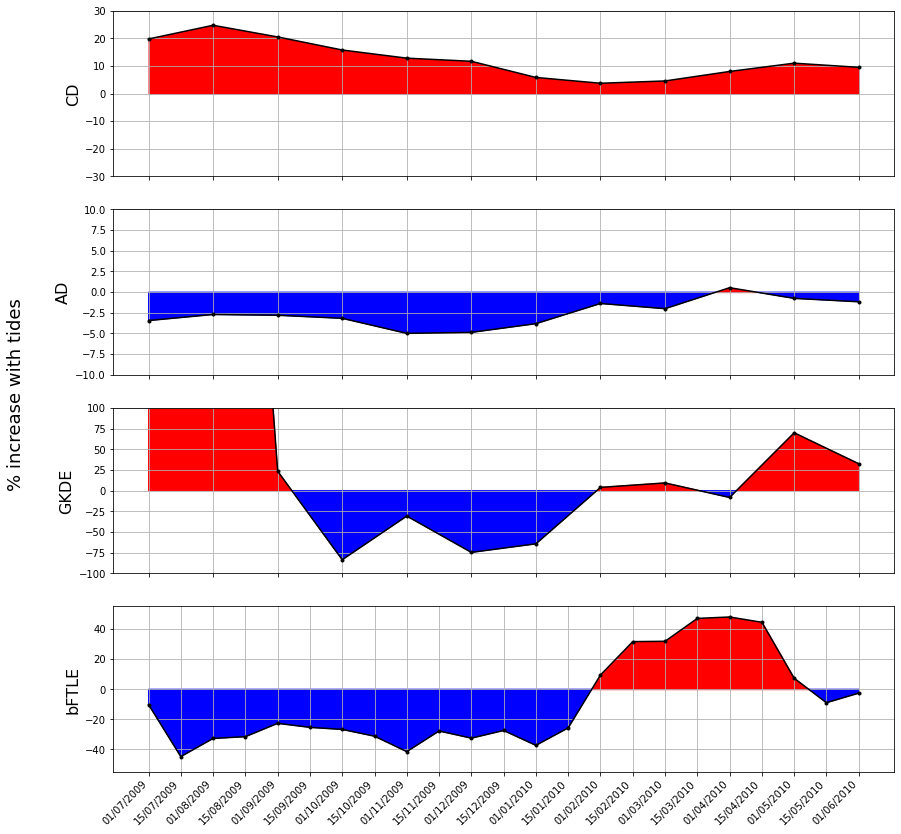

In [65]:
x = np.arange(len(labels))  # the label locations
d = np.zeros_like(x)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14,14))

### CD
ax1.plot(x, cum_dist_diff_nT_wT_n[:,0], '.-k')
# ax1.tick_params('x', labelsize=6)

ax1.fill_between(x, cum_dist_diff_nT_wT_n[:,0], where=cum_dist_diff_nT_wT_n[:,0]>=d, interpolate=True, color='red')
ax1.fill_between(x, cum_dist_diff_nT_wT_n[:,0], where=cum_dist_diff_nT_wT_n[:,0]<=d, interpolate=True, color='blue')

ax1.grid() #axis='y')
ax1.set_ylabel('CD', size=16);
ax1.set_xticks(x)
# ax4.set_xticklabels(labels, rotation=45, horizontalalignment='right')
# ax1.set_xticklabels(labels_all, rotation=45, horizontalalignment='right')
ax1.set_ylim([-30, 30])

### AD
ax2.plot(x, tot_dist_diff_nT_wT_n[:,0], '.-k')
# ax2.tick_params('x', labelsize=6)

ax2.fill_between(x, tot_dist_diff_nT_wT_n[:,0], where=tot_dist_diff_nT_wT_n[:,0]>=d, interpolate=True, color='red')
ax2.fill_between(x, tot_dist_diff_nT_wT_n[:,0], where=tot_dist_diff_nT_wT_n[:,0]<=d, interpolate=True, color='blue')

ax2.grid() #axis='y')
ax2.set_ylabel('AD', size=16);
ax2.set_xticks(x) #x)
# ax4.set_xticklabels(labels, rotation=45, horizontalalignment='right')
# ax1.set_xticklabels(labels_all, rotation=45, horizontalalignment='right')
ax2.set_ylim([-10, 10])

# plt.plot(t, s2)
# # make these tick labels invisible
# plt.tick_params('x', labelbottom=False)

### GKDE
x = np.arange(0,len(labels)*2,2) # the label locations
d=np.zeros_like(x)

ax3.plot(x, GKDE_diff_nT_wT_n, '.-k')
ax3.fill_between(x, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n>=d, interpolate=True, color='red')
ax3.fill_between(x, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n<=d, interpolate=True, color='blue')

ax3.grid() #axis='y')
# ax3.set_ylabel('% difference of high convergence', size=16);

ax3.set_ylabel('GKDE', size=16);
ax3.set_xticks(x)
# ax3.set_xticklabels(labels, rotation=45, horizontalalignment='right')
ax3.set_ylim([-100, 100])

### BFTLE
x = np.arange(len(labels_all))  # the label locations
d=np.zeros_like(x)

ax4.plot(x[0:-1], diff_nT_wT_n[0:-1], '.-k')
ax4.fill_between(x[0:-1], diff_nT_wT_n[0:-1], where=diff_nT_wT_n[0:-1]>=d[0:-1], interpolate=True, color='red')
ax4.fill_between(x[0:-1], diff_nT_wT_n[0:-1], where=diff_nT_wT_n[0:-1]<=d[0:-1], interpolate=True, color='blue')

ax4.grid() #axis='y')
ax4.set_ylabel('bFTLE', size=16) #% difference of high convergence', size=16);
ax4.set_xticks(x[0:-1])
# ax4.set_xticklabels(labels, rotation=45, horizontalalignment='right')
ax4.set_xticklabels(labels_all[0:-1], rotation=45, horizontalalignment='right')
ax4.set_ylim([-55, 55])

for ax in fig.get_axes():
    ax.label_outer()
    
fig.supylabel('% increase with tides', size=18)

plt.show()


In [66]:
labels_all

['01/07/2009',
 '15/07/2009',
 '01/08/2009',
 '15/08/2009',
 '01/09/2009',
 '15/09/2009',
 '01/10/2009',
 '15/10/2009',
 '01/11/2009',
 '15/11/2009',
 '01/12/2009',
 '15/12/2009',
 '01/01/2010',
 '15/01/2010',
 '01/02/2010',
 '15/02/2010',
 '01/03/2010',
 '15/03/2010',
 '01/04/2010',
 '15/04/2010',
 '01/05/2010',
 '15/05/2010',
 '01/06/2010',
 '15/06/2010']

# Plotting only bFTLE on first of the month:

# Fixing time axis: (first 3 plots not 01 but 28 of month before!)

## Test:

In [67]:
from datetime import datetime, timedelta
import numpy as np
t = np.arange(datetime(2009,7,1), datetime(2010,7,1), timedelta(days=1)).astype(datetime)

In [68]:
t

array([datetime.datetime(2009, 7, 1, 0, 0),
       datetime.datetime(2009, 7, 2, 0, 0),
       datetime.datetime(2009, 7, 3, 0, 0),
       datetime.datetime(2009, 7, 4, 0, 0),
       datetime.datetime(2009, 7, 5, 0, 0),
       datetime.datetime(2009, 7, 6, 0, 0),
       datetime.datetime(2009, 7, 7, 0, 0),
       datetime.datetime(2009, 7, 8, 0, 0),
       datetime.datetime(2009, 7, 9, 0, 0),
       datetime.datetime(2009, 7, 10, 0, 0),
       datetime.datetime(2009, 7, 11, 0, 0),
       datetime.datetime(2009, 7, 12, 0, 0),
       datetime.datetime(2009, 7, 13, 0, 0),
       datetime.datetime(2009, 7, 14, 0, 0),
       datetime.datetime(2009, 7, 15, 0, 0),
       datetime.datetime(2009, 7, 16, 0, 0),
       datetime.datetime(2009, 7, 17, 0, 0),
       datetime.datetime(2009, 7, 18, 0, 0),
       datetime.datetime(2009, 7, 19, 0, 0),
       datetime.datetime(2009, 7, 20, 0, 0),
       datetime.datetime(2009, 7, 21, 0, 0),
       datetime.datetime(2009, 7, 22, 0, 0),
       datetime.dat

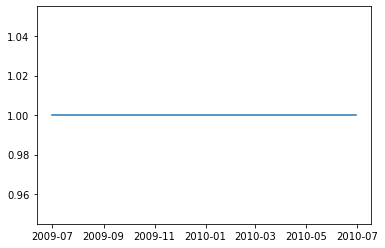

In [69]:
aa = np.ones_like(t)
plt.plot(t, aa)

In [70]:
time_01 = np.arange(datetime(2009,7,28), datetime(2010,6,29), timedelta(days=30)).astype(datetime)

In [71]:
time_01

array([datetime.datetime(2009, 7, 28, 0, 0),
       datetime.datetime(2009, 8, 27, 0, 0),
       datetime.datetime(2009, 9, 26, 0, 0),
       datetime.datetime(2009, 10, 26, 0, 0),
       datetime.datetime(2009, 11, 25, 0, 0),
       datetime.datetime(2009, 12, 25, 0, 0),
       datetime.datetime(2010, 1, 24, 0, 0),
       datetime.datetime(2010, 2, 23, 0, 0),
       datetime.datetime(2010, 3, 25, 0, 0),
       datetime.datetime(2010, 4, 24, 0, 0),
       datetime.datetime(2010, 5, 24, 0, 0),
       datetime.datetime(2010, 6, 23, 0, 0)], dtype=object)

In [72]:
time_01[1] = datetime(2009,8,28)
time_01[2] = datetime(2009,9,28)
time_01[3] = datetime(2009,10,28)
time_01[4] = datetime(2009,11,28)
time_01[5] = datetime(2009,12,28)
time_01[6] = datetime(2010,1,28)
time_01[7] = datetime(2010,2,28)
time_01[8] = datetime(2010,3,28)
time_01[9] = datetime(2010,4,28)
time_01[10] = datetime(2010,5,28)
time_01[11] = datetime(2010,6,28)

In [73]:
time_01

array([datetime.datetime(2009, 7, 28, 0, 0),
       datetime.datetime(2009, 8, 28, 0, 0),
       datetime.datetime(2009, 9, 28, 0, 0),
       datetime.datetime(2009, 10, 28, 0, 0),
       datetime.datetime(2009, 11, 28, 0, 0),
       datetime.datetime(2009, 12, 28, 0, 0),
       datetime.datetime(2010, 1, 28, 0, 0),
       datetime.datetime(2010, 2, 28, 0, 0),
       datetime.datetime(2010, 3, 28, 0, 0),
       datetime.datetime(2010, 4, 28, 0, 0),
       datetime.datetime(2010, 5, 28, 0, 0),
       datetime.datetime(2010, 6, 28, 0, 0)], dtype=object)

https://stackoverflow.com/questions/22696662/python-list-of-first-day-of-month-for-given-period :

In [74]:
import datetime
startyear = 2009
startmonth = 7
endyear = 2010
endmonth = 6

In [75]:
time_02 = [datetime.date(m//12, m%12+1, 1) for m in range(startyear*12+startmonth-1, endyear*12+endmonth)]


In [76]:
time_02

[datetime.date(2009, 7, 1),
 datetime.date(2009, 8, 1),
 datetime.date(2009, 9, 1),
 datetime.date(2009, 10, 1),
 datetime.date(2009, 11, 1),
 datetime.date(2009, 12, 1),
 datetime.date(2010, 1, 1),
 datetime.date(2010, 2, 1),
 datetime.date(2010, 3, 1),
 datetime.date(2010, 4, 1),
 datetime.date(2010, 5, 1),
 datetime.date(2010, 6, 1)]

In [77]:
len(cum_dist_diff_nT_wT_n[:,0])

12

In [78]:
len(time_01)

12

In [79]:
len(diff_nT_wT_n)

24

In [80]:
len(time_02)

12

In [81]:
# Choosing every 2 steps (just day 01)
diff_nT_wT_n[0:-1:2]

[-10.210051674450957,
 -32.758543035278834,
 -22.706175268189227,
 -26.759726759726753,
 -41.503543893172186,
 -32.55605284210071,
 -37.350142721217885,
 9.451600435052251,
 31.83700611655025,
 47.99924149846193,
 7.2571113120578135,
 -2.6260776076612093]

In [82]:
len(diff_nT_wT_n[0:-1:2])

12

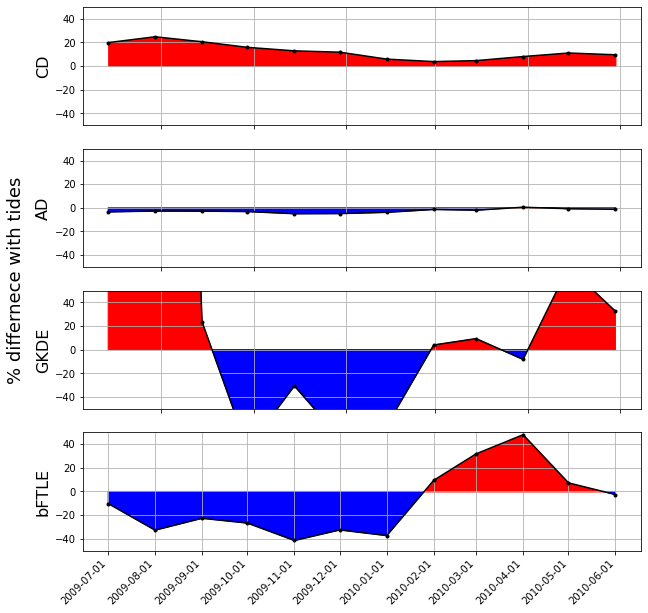

In [83]:
x = np.arange(len(labels))  # the label locations
d=np.zeros_like(x)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,10))

x = np.arange(0,len(labels)*2,2) # the label locations
d=np.zeros_like(x)

### CD
ax1.plot(time_01, cum_dist_diff_nT_wT_n[:,0], '.-k')
# ax1.tick_params('x', labelsize=6)

ax1.fill_between(time_01, cum_dist_diff_nT_wT_n[:,0], where=cum_dist_diff_nT_wT_n[:,0]>=d, interpolate=True, color='red')
ax1.fill_between(time_01, cum_dist_diff_nT_wT_n[:,0], where=cum_dist_diff_nT_wT_n[:,0]<=d, interpolate=True, color='blue')

ax1.grid() #axis='y')
ax1.set_ylabel('CD', size=16);
# ax1.set_xticks(x)
ax1.set_ylim([-50, 50])

### AD
ax2.plot(time_01, tot_dist_diff_nT_wT_n[:,0], '.-k')

ax2.fill_between(time_01, tot_dist_diff_nT_wT_n[:,0], where=tot_dist_diff_nT_wT_n[:,0]>=d, interpolate=True, color='red')
ax2.fill_between(time_01, tot_dist_diff_nT_wT_n[:,0], where=tot_dist_diff_nT_wT_n[:,0]<=d, interpolate=True, color='blue')

ax2.grid() #axis='y')
ax2.set_ylabel('AD', size=16);
# ax2.set_xticks(x) #x)
ax2.set_ylim([-50, 50])

### GKDE

ax3.plot(time_01, GKDE_diff_nT_wT_n, '.-k')
ax3.fill_between(time_01, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n>=d, interpolate=True, color='red')
ax3.fill_between(time_01, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n<=d, interpolate=True, color='blue')

ax3.grid() #axis='y')
# ax3.set_ylabel('% difference of high convergence', size=16);

ax3.set_ylabel('GKDE', size=16);
# ax3.set_xticks(x)
ax3.set_ylim([-50, 50])

### BFTLE
x = np.arange(len(time_02))  # the label locations
d = np.zeros_like(x)

ax4.plot(time_02, diff_nT_wT_n[0:-1:2], '.-k')
ax4.fill_between(time_02, diff_nT_wT_n[0:-1:2], where=diff_nT_wT_n[0:-1:2]>=d, interpolate=True, color='red')
ax4.fill_between(time_02, diff_nT_wT_n[0:-1:2], where=diff_nT_wT_n[0:-1:2]<=d, interpolate=True, color='blue')

ax4.grid() #axis='y')
ax4.set_ylabel('bFTLE', size=16) #% difference of high convergence', size=16);
ax4.set_xticks(time_02)
ax4.set_xticklabels(time_02, rotation=45, horizontalalignment='right')
ax4.set_ylim([-50, 50])

for ax in fig.get_axes():
    ax.label_outer()

fig.supylabel('% differnece with tides', size=18)

plt.show()


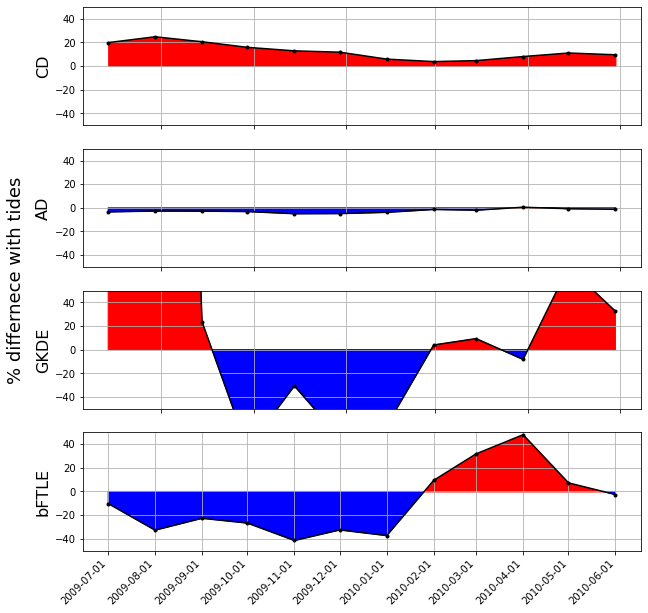

In [84]:
x = np.arange(len(labels))  # the label locations
d=np.zeros_like(x)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,10))

x = np.arange(0,len(labels)*2,2) # the label locations
d=np.zeros_like(x)

### CD
ax1.plot(time_01, cum_dist_diff_nT_wT_n[:,0], '.-k')
# ax1.tick_params('x', labelsize=6)

ax1.fill_between(time_01, cum_dist_diff_nT_wT_n[:,0], where=cum_dist_diff_nT_wT_n[:,0]>=d, interpolate=True, color='red')
ax1.fill_between(time_01, cum_dist_diff_nT_wT_n[:,0], where=cum_dist_diff_nT_wT_n[:,0]<=d, interpolate=True, color='blue')

ax1.grid() #axis='y')
ax1.set_ylabel('CD', size=16);
# ax1.set_xticks(x)
ax1.set_ylim([-50, 50])

### AD
ax2.plot(time_01, tot_dist_diff_nT_wT_n[:,0], '.-k')

ax2.fill_between(time_01, tot_dist_diff_nT_wT_n[:,0], where=tot_dist_diff_nT_wT_n[:,0]>=d, interpolate=True, color='red')
ax2.fill_between(time_01, tot_dist_diff_nT_wT_n[:,0], where=tot_dist_diff_nT_wT_n[:,0]<=d, interpolate=True, color='blue')

ax2.grid() #axis='y')
ax2.set_ylabel('AD', size=16);
# ax2.set_xticks(x) #x)
ax2.set_ylim([-50, 50])

### GKDE

ax3.plot(time_01, GKDE_diff_nT_wT_n, '.-k')
ax3.fill_between(time_01, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n>=d, interpolate=True, color='red')
ax3.fill_between(time_01, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n<=d, interpolate=True, color='blue')

ax3.grid() #axis='y')
# ax3.set_ylabel('% difference of high convergence', size=16);

ax3.set_ylabel('GKDE', size=16);
# ax3.set_xticks(x)
ax3.set_ylim([-50, 50])

### BFTLE
x = np.arange(len(time_02))  # the label locations
d=np.zeros_like(x)

ax4.plot(time_02, diff_nT_wT_n[0:-1:2], '.-k')
ax4.fill_between(time_02, diff_nT_wT_n[0:-1:2], where=diff_nT_wT_n[0:-1:2]>=d, interpolate=True, color='red')
ax4.fill_between(time_02, diff_nT_wT_n[0:-1:2], where=diff_nT_wT_n[0:-1:2]<=d, interpolate=True, color='blue')

ax4.grid() #axis='y')
ax4.set_ylabel('bFTLE', size=16) #% difference of high convergence', size=16);
ax4.set_xticks(time_02)
ax4.set_xticklabels(time_02, rotation=45, horizontalalignment='right')
ax4.set_ylim([-50, 50])

for ax in fig.get_axes():
    ax.label_outer()

fig.supylabel('% differnece with tides', size=18)

plt.show()


In [85]:
import datetime
startyear = 2009
startmonth = 7
endyear = 2010
endmonth = 6

In [86]:
time_02b = [datetime.date(m//12, m%12+1, 15) for m in range(startyear*12+startmonth-1, endyear*12+endmonth)]


In [87]:
time_02b

[datetime.date(2009, 7, 15),
 datetime.date(2009, 8, 15),
 datetime.date(2009, 9, 15),
 datetime.date(2009, 10, 15),
 datetime.date(2009, 11, 15),
 datetime.date(2009, 12, 15),
 datetime.date(2010, 1, 15),
 datetime.date(2010, 2, 15),
 datetime.date(2010, 3, 15),
 datetime.date(2010, 4, 15),
 datetime.date(2010, 5, 15),
 datetime.date(2010, 6, 15)]

In [88]:
time02c = time_02 + time_02b

In [89]:
time02c.sort()

In [90]:
time02c

[datetime.date(2009, 7, 1),
 datetime.date(2009, 7, 15),
 datetime.date(2009, 8, 1),
 datetime.date(2009, 8, 15),
 datetime.date(2009, 9, 1),
 datetime.date(2009, 9, 15),
 datetime.date(2009, 10, 1),
 datetime.date(2009, 10, 15),
 datetime.date(2009, 11, 1),
 datetime.date(2009, 11, 15),
 datetime.date(2009, 12, 1),
 datetime.date(2009, 12, 15),
 datetime.date(2010, 1, 1),
 datetime.date(2010, 1, 15),
 datetime.date(2010, 2, 1),
 datetime.date(2010, 2, 15),
 datetime.date(2010, 3, 1),
 datetime.date(2010, 3, 15),
 datetime.date(2010, 4, 1),
 datetime.date(2010, 4, 15),
 datetime.date(2010, 5, 1),
 datetime.date(2010, 5, 15),
 datetime.date(2010, 6, 1),
 datetime.date(2010, 6, 15)]

In [91]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d/%m/%Y')

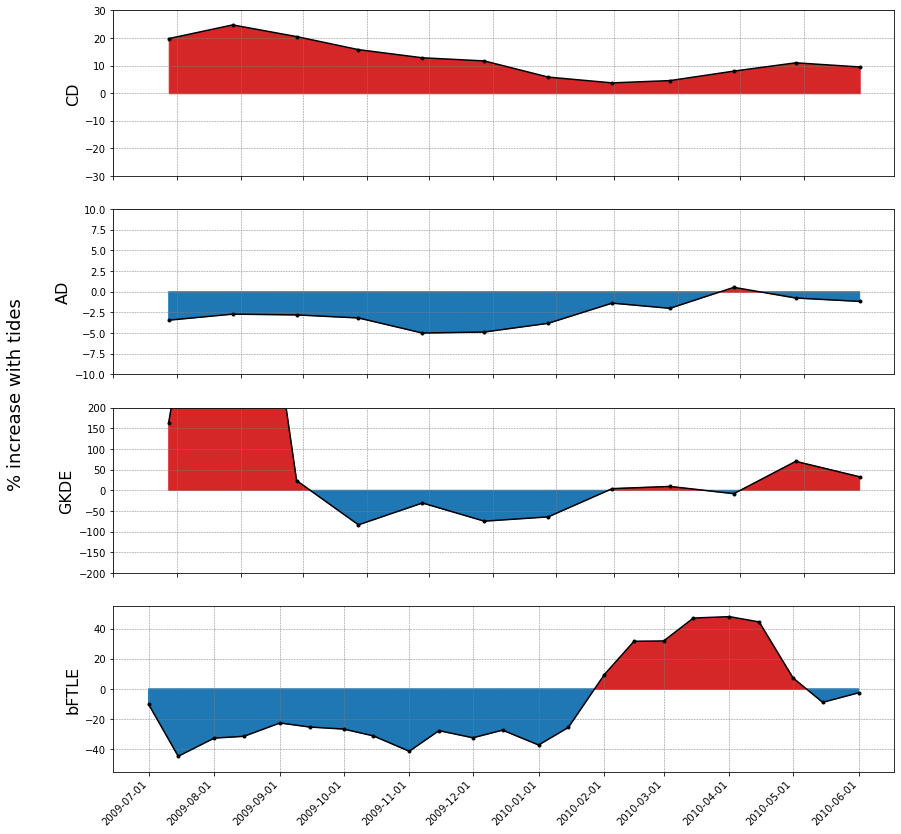

In [93]:
x = np.arange(len(labels))  # the label locations
d = np.zeros_like(x)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14,14))

### CD
ax1.plot(time_01, cum_dist_diff_nT_wT_n[:,0], '.-k')
# ax1.tick_params('x', labelsize=6)

ax1.fill_between(time_01, cum_dist_diff_nT_wT_n[:,0], where=cum_dist_diff_nT_wT_n[:,0]>=d, interpolate=True, color='C3')
ax1.fill_between(time_01, cum_dist_diff_nT_wT_n[:,0], where=cum_dist_diff_nT_wT_n[:,0]<=d, interpolate=True, color='C0')

ax1.set_ylabel('CD', size=16);
# ax1.set_xticks(x)
# ax4.set_xticklabels(labels, rotation=45, horizontalalignment='right')
# ax1.set_xticklabels(labels_all, rotation=45, horizontalalignment='right')
ax1.xaxis.set_major_formatter(myFmt)
ax1.set_ylim([-30, 30])
# ax1.grid() #axis='y')

### AD
ax2.plot(time_01, tot_dist_diff_nT_wT_n[:,0], '.-k')
# ax2.tick_params('x', labelsize=6)

ax2.fill_between(time_01, tot_dist_diff_nT_wT_n[:,0], where=tot_dist_diff_nT_wT_n[:,0]>=d, interpolate=True, color='C3')
ax2.fill_between(time_01, tot_dist_diff_nT_wT_n[:,0], where=tot_dist_diff_nT_wT_n[:,0]<=d, interpolate=True, color='C0')

ax2.set_ylabel('AD', size=16);
# ax2.set_xticks(x) #x)
# ax4.set_xticklabels(labels, rotation=45, horizontalalignment='right')
# ax1.set_xticklabels(labels_all, rotation=45, horizontalalignment='right')
ax2.xaxis.set_major_formatter(myFmt)
ax2.set_ylim([-10, 10])
# ax2.grid() #axis='y')

# plt.plot(t, s2)
# # make these tick labels invisible
# plt.tick_params('x', labelbottom=False)

### GKDE
# x = np.arange(0,len(labels)*2,2) # the label locations
# d=np.zeros_like(x)

ax3.plot(time_01, GKDE_diff_nT_wT_n, '.-k')
ax3.fill_between(time_01, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n>=d, interpolate=True, color='C3')
ax3.fill_between(time_01, GKDE_diff_nT_wT_n, where=GKDE_diff_nT_wT_n<=d, interpolate=True, color='C0')

# ax3.set_ylabel('% difference of high convergence', size=16);
ax3.set_ylabel('GKDE', size=16);
# ax3.set_xticks(x)
# ax3.set_xticklabels(labels, rotation=45, horizontalalignment='right')
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_ylim([-200, 200])
# ax3.grid() #axis='y')

### BFTLE
x = np.arange(len(labels_all))  # the label locations
d=np.zeros_like(x)

ax4.plot(time02c[0:-1], diff_nT_wT_n[0:-1], '.-k')
ax4.fill_between(time02c[0:-1], diff_nT_wT_n[0:-1], where=diff_nT_wT_n[0:-1]>=d[0:-1], interpolate=True, color='C3')
ax4.fill_between(time02c[0:-1], diff_nT_wT_n[0:-1], where=diff_nT_wT_n[0:-1]<=d[0:-1], interpolate=True, color='C0')

ax4.set_ylabel('bFTLE', size=16) #% difference of high convergence', size=16);
# ax4.set_xticks(x[0:-1])
# ax4.set_xticklabels(labels, rotation=45, horizontalalignment='right')
# ax4.set_xticklabels(labels_all[0:-1], rotation=45, horizontalalignment='right')
ax4.xaxis.set_major_formatter(myFmt)
ax4.set_ylim([-55, 55])
# ax4.grid() #axis='y')

for ax in fig.get_axes():
    ax.set_xticks(time_02)
    ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='gray')
    ax.label_outer()

ax4.set_xticklabels(time_02, rotation=45, horizontalalignment='right')
# ax4.set_xlabel('Date [Year-Month-Day]', size=18)
fig.supylabel('% increase with tides', size=18)

plt.savefig('figs/Joint_plot_02.jpg', dpi=300, bbox_inches='tight')

plt.show()
